# Топологическая сортировка

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

## 1. Реализация через матрицу смежности

In [2]:
def get_m_adjacency_matrix(adjacency_matrix, n):
    m = [0 for i in range(n)]
    for i in range(n):
        for j in range(n):
            m[j] += adjacency_matrix[i][j]
    return m


def update_m_adjacency_matrix(adjacency_matrix, n, m, nodes):
    for i in nodes:
        for j in range(n):
            m[j] -= adjacency_matrix[i][j]
    return m


def get_nodes_from_m(m, n):
    for i in range(n):
        if not m[i]:
            yield i

            
def sort_topological_Demucron_adjacency_matrix(adjacency_matrix):
    processed = set()
    N = len(adjacency_matrix)
    m = get_m_adjacency_matrix(adjacency_matrix, N)
    while len(processed) != N:
        nodes = set(node for node in get_nodes_from_m(m, N) if node not in processed)
        yield nodes
        processed = processed.union(nodes)
        m = update_m_adjacency_matrix(adjacency_matrix, N, m, nodes)

## 2. Реализация через вектора смежности

In [3]:
def get_m_adjacency_vectors(adjacency_vectors, n):
    m = [0 for i in range(n)]
    for nodes_dest in adjacency_vectors:
        for node_dest in nodes_dest:
            m[node_dest] += 1
    return m


def update_m_adjacency_vectors(adjacency_vectors, n, m, nodes):
    for node_src in nodes:
        for node_dest in adjacency_vectors[node_src]:
            m[node_dest] -= 1
    return m


def sort_topological_Demucron_adjacency_vectors(adjacency_vectors):
    processed = []
    result = []
    N = len(adjacency_vectors)
    m = get_m_adjacency_vectors(adjacency_vectors, N)
    while len(processed) != N:
        nodes = [node for node in get_nodes_from_m(m, N) if node not in processed]
        result.append(nodes)
        processed.extend(nodes)
        m = update_m_adjacency_vectors(adjacency_vectors, N, m, nodes)
    return result

## 3. Проверка корректности работы реализаций алгоритма

### На примере графа из слайдов к лекции

In [4]:
def to_adjacency_matrix(vectors):
    matrix = [[0 for i in range(len(vectors))] for i in range(len(vectors))]
    for node_src, nodes_dest in enumerate(vectors):
        for node_dest in nodes_dest:
            matrix[node_src][node_dest] = 1
    return matrix

In [5]:
vectors = [
    [12, 2],
    [12],
    [],
    [2],
    [2, 8, 9],
    [3, 11, 10],
    [10],
    [1, 3, 5, 6],
    [13, 0],
    [0, 11, 6],
    [2],
    [],
    [2],
    [5],
]

#### Матрица смежности

In [6]:
adjacency_matrix = to_adjacency_matrix(vectors)
adjacency_matrix

[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]

In [7]:
result_adjacency_matrix = list(group for group in sort_topological_Demucron_adjacency_matrix(adjacency_matrix))
print(result_adjacency_matrix)

[{4, 7}, {8, 1, 9}, {0, 13, 6}, {12, 5}, {11, 10, 3}, {2}]


In [8]:
flat_result_adjacency_matrix = [elem for group in result_adjacency_matrix for elem in group]
print(flat_result_adjacency_matrix)

[4, 7, 8, 1, 9, 0, 13, 6, 12, 5, 11, 10, 3, 2]


#### Векторы смежности

In [9]:
result_adjacency_vectors = list(group for group in sort_topological_Demucron_adjacency_vectors(vectors))
print(result_adjacency_vectors)

[[4, 7], [1, 8, 9], [0, 6, 13], [5, 12], [3, 10, 11], [2]]


In [10]:
flat_result_adjacency_vectors = [elem for group in result_adjacency_vectors for elem in group]
print(flat_result_adjacency_vectors)

[4, 7, 1, 8, 9, 0, 6, 13, 5, 12, 3, 10, 11, 2]


#### Готовая библиотека NetworkX

In [11]:
G = nx.DiGraph()
for node_src, nodes_dest in enumerate(vectors):
    G.add_node(node_src)
    for node_dest in nodes_dest:
        G.add_edge(node_src, node_dest)

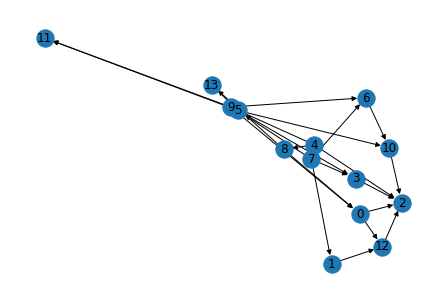

In [12]:
nx.draw(G, with_labels=True)
plt.show()

In [13]:
print(list(nx.algorithms.dag.topological_sort(G)))

[7, 1, 4, 9, 6, 8, 0, 12, 13, 5, 10, 11, 3, 2]


In [14]:
list(nx.algorithms.dag.lexicographical_topological_sort(G))

[4, 7, 1, 8, 9, 0, 6, 12, 13, 5, 3, 10, 2, 11]

Проверим, что полученные результаты присутствуют среди всех возможных вариантов сортировки

In [15]:
result_networkx = list(nx.algorithms.dag.all_topological_sorts(G))
print(flat_result_adjacency_matrix in result_networkx)
print(flat_result_adjacency_vectors in result_networkx)

True
True


### На примере случайно сгенерированного графа

In [16]:
def generate_DAG_adjacency_vectors(N, max_degree):
    vectors = []
    for i in range(N):
        nodes = []
        available_nodes = [x for x in range(N) if x != i]
        for j in range(random.randint(0, max_degree)):
            node = available_nodes.pop(random.randint(0, len(available_nodes)-1))
            # lower triangular matrix = DAG
            if i >= node:
                nodes.append(node)
        vectors.append(nodes)
    return vectors

In [17]:
vectors = generate_DAG_adjacency_vectors(10, 4)

#### Матрица смежности

In [18]:
adjacency_matrix = to_adjacency_matrix(vectors)
result_adjacency_matrix = list(group for group in sort_topological_Demucron_adjacency_matrix(adjacency_matrix))
print(result_adjacency_matrix)

[{4, 6, 7, 8, 9}, {2, 3, 5}, {1}, {0}]


In [19]:
flat_result_adjacency_matrix = [elem for group in result_adjacency_matrix for elem in group]
print(flat_result_adjacency_matrix)

[4, 6, 7, 8, 9, 2, 3, 5, 1, 0]


#### Векторы смежности

In [20]:
result_adjacency_vectors = list(group for group in sort_topological_Demucron_adjacency_vectors(vectors))
print(result_adjacency_vectors)

[[4, 6, 7, 8, 9], [2, 3, 5], [1], [0]]


In [21]:
flat_result_adjacency_vectors = [elem for group in result_adjacency_vectors for elem in group]
print(flat_result_adjacency_vectors)

[4, 6, 7, 8, 9, 2, 3, 5, 1, 0]


#### Готовая библиотека NetworkX

In [22]:
G = nx.DiGraph()
for node_src, nodes_dest in enumerate(vectors):
    G.add_node(node_src)
    for node_dest in nodes_dest:
        G.add_edge(node_src, node_dest)

In [23]:
print(list(nx.algorithms.dag.topological_sort(G)))

[9, 8, 3, 7, 1, 6, 5, 2, 4, 0]


Проверим, что полученные результаты присутствуют среди всех возможных вариантов сортировки

In [24]:
result_networkx = list(nx.algorithms.dag.all_topological_sorts(G))
print(flat_result_adjacency_matrix in result_networkx)
print(flat_result_adjacency_vectors in result_networkx)

True
True


### 4. Сравнение времени выполнения алгоритма

In [25]:
N = 1000
max_degree = 10

#### Матрица смежности

In [26]:
%%timeit -r 3 -n 3 -o -q
vectors = generate_DAG_adjacency_vectors(N, max_degree)
adjacency_matrix = to_adjacency_matrix(vectors)
list(group for group in sort_topological_Demucron_adjacency_matrix(adjacency_matrix))

<TimeitResult : 191 ms ± 1.36 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

#### Векторы смежности

In [27]:
%%timeit -r 3 -n 3 -o -q
vectors = generate_DAG_adjacency_vectors(N, max_degree)
sort_topological_Demucron_adjacency_vectors(vectors)

<TimeitResult : 64.6 ms ± 2.09 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

#### Готовая библиотека NetworkX

In [28]:
%%timeit -r 3 -n 3 -o -q
vectors = generate_DAG_adjacency_vectors(N, max_degree)
G = nx.DiGraph()
for node_src, nodes_dest in enumerate(vectors):
    G.add_node(node_src)
    for node_dest in nodes_dest:
        G.add_edge(node_src, node_dest)
list(nx.algorithms.dag.topological_sort(G))

<TimeitResult : 48.1 ms ± 461 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)>